# Task1 Prediction using Supervised ML
# Name: Jakir Husain Luhar
# Way: Find best model and use it

# Import all usable libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<-- Load Data -->

In [2]:
data=pd.read_csv("task1.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<-- Define variable -->

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

# Use Linear Regression

In [5]:
linearReg=LinearRegression()

# Fit Model 

In [6]:
linearReg.fit(X_train,y_train)

LinearRegression()

In [7]:
accuracy_Linear=linearReg.score(X_test,y_test)
accuracy_Linear

0.9568211104435257

In [8]:
# Y=linearReg.coef_*X+linearReg.intercept_
pre_linear=linearReg.predict(X)

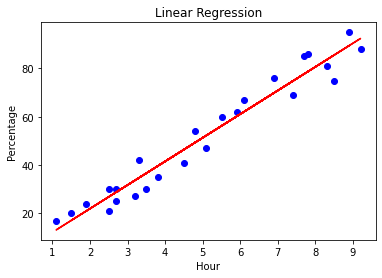

In [9]:
plt.title("Linear Regression")
plt.scatter(X, y,color='b')
plt.plot(X,pre_linear,color='r',label='Linear Regression')
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.show()

## Use polynomial regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [11]:
acc=[]
for degree in range(10):
    polyReg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
    polyReg.fit(X_train,y_train)
    accuracy=polyReg.score(X_test,y_test)
    acc.append(accuracy)
    print(degree,accuracy)


0 -0.21996354476764934
1 0.9568211104435257
2 0.9518734808270334
3 0.9589252325354601
4 0.9582090906437885
5 0.9632734943791974
6 0.9149569859047267
7 0.7517390910518684
8 0.8446225298894854
9 -5.876307485898089


In [12]:
max(acc)

0.9632734943791974

<-- We see that maximum accuracy is get at 5 degree -->

In [13]:
polyReg=make_pipeline(PolynomialFeatures(5),LinearRegression())
polyReg.fit(X_train,y_train)
accuracy_Poly=polyReg.score(X_test,y_test)
accuracy_Poly

0.9632734943791974

In [14]:
pre_Poly=polyReg.predict(X.reshape(-1,1))
# x_poly=PolynomialFeatures(degree=5).fit_transform(X)
sorted_zip = sorted(zip(X,pre_Poly))
x_poly, poly_pred = zip(*sorted_zip)

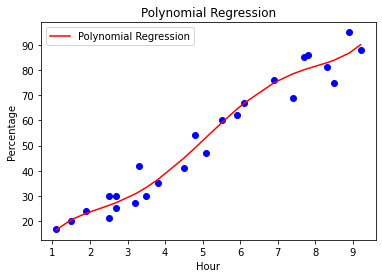

In [15]:
plt.title("Polynomial Regression")
plt.scatter(X, y,color='b')
plt.plot(x_poly,poly_pred,color='r',label='Polynomial Regression')
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.legend()
plt.show()

 

# Using Rigde Regression 

In [16]:
from sklearn.linear_model import Ridge

In [17]:
alpha=0.1
acc=[]
while(alpha<=1.0):
    ridgeReg=Ridge(alpha)
    ridgeReg.fit(X_train,y_train)
    accuracy=ridgeReg.score(X_test,y_test)
    print(round(alpha,2),accuracy)
    acc.append(accuracy)
    alpha=alpha+0.1

0.1 0.9568306248530701
0.2 0.9568379137647015
0.3 0.9568429899839679
0.4 0.9568458662426018
0.5 0.9568465551989939
0.6 0.956845069438661
0.7 0.9568414214747132
0.8 0.9568356237483154
0.9 0.9568276886291469
1.0 0.9568176284158576


In [18]:
max(acc)

0.9568465551989939

<-- As we see accuracy is max at 0.5 alpha value -->

In [19]:
ridgeReg=Ridge(0.5)
ridgeReg.fit(X_train,y_train)
accuracy_Ridge=ridgeReg.score(X_test,y_test)
print(accuracy_Ridge)

0.9568465551989939


In [20]:
pre_ridge=ridgeReg.predict(X)

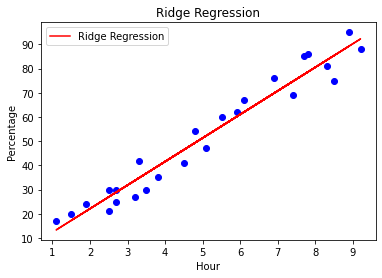

In [21]:
plt.title("Ridge Regression")
plt.scatter(X, y,color='b')
plt.plot(X,pre_ridge,color='r',label='Ridge Regression')
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.legend()
plt.show()

 

# Using Lasso Regression 

In [22]:
from sklearn.linear_model import Lasso

In [23]:
alpha=0.1
acc=[]
while(alpha<=1.0):
    lassoReg=Lasso(alpha)
    lassoReg.fit(X_train,y_train)
    accuracy=lassoReg.score(X_test,y_test)
    print(round(alpha,2),accuracy)
    acc.append(accuracy)
    alpha=alpha+0.1

0.1 0.9568362295875352
0.2 0.956844659330271
0.3 0.9568463996717328
0.4 0.9568414506119207
0.5 0.956829812150835
0.6 0.9568114842884753
0.7 0.9567864670248418
0.8 0.9567547603599345
0.9 0.9567163642937534
1.0 0.9566712788262984


In [24]:
max(acc)

0.9568463996717328

<-- As we see accuracy is max at 0.3 alpha value -->

In [25]:
lassoReg=Lasso(0.3)
lassoReg.fit(X_train,y_train)
accuracy_Lasso=lassoReg.score(X_test,y_test)
accuracy_Lasso

0.9568463996717328

In [26]:
pre_lasso=lassoReg.predict(X)

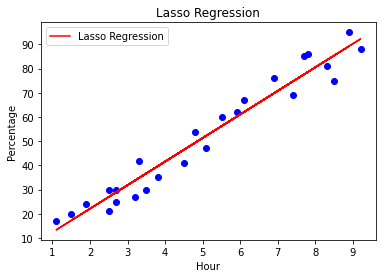

In [27]:
plt.title("Lasso Regression")
plt.scatter(X, y,color='b')
plt.plot(X,pre_lasso,color='r',label='Lasso Regression')
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.legend()
plt.show()

 

 # Using ElasticNet Regression 

In [28]:
from sklearn.linear_model import ElasticNet

In [29]:
alpha=0.1
acc=[]
while(alpha<=1.0):
    elasticReg=ElasticNet(alpha)
    elasticReg.fit(X_train,y_train)
    accuracy=elasticReg.score(X_test,y_test)
    print(round(alpha,2),accuracy)
    acc.append(accuracy)
    alpha=alpha+0.1

0.1 0.9568241524044153
0.2 0.956640270262051
0.3 0.9562784164925446
0.4 0.9557471181662734
0.5 0.955054499232343
0.6 0.9542083015000149
0.7 0.9532159044017755
0.8 0.9520843436166535
0.9 0.9508203286268017
1.0 0.9494302592752049


In [30]:
max(acc)

0.9568241524044153

<-- As we see accuracy is max at 0.1 alpha value -->

In [31]:
elasticReg=ElasticNet(0.1)
elasticReg.fit(X_train,y_train)
accuracy_Elastic=elasticReg.score(X_test,y_test)
accuracy_Elastic

0.9568241524044153

In [32]:
pre_elastic=elasticReg.predict(X)

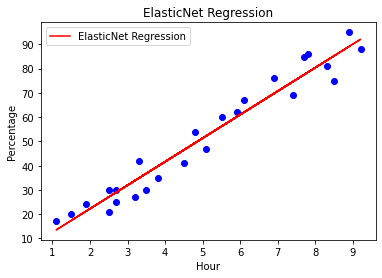

In [33]:
plt.title("ElasticNet Regression")
plt.scatter(X, y,color='b')
plt.plot(X,pre_elastic,color='r',label='ElasticNet Regression')
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.legend()
plt.show()

 

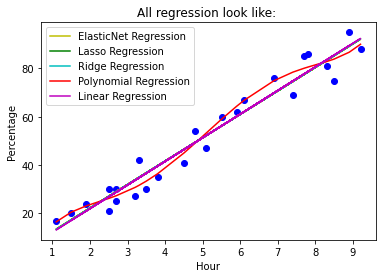

In [34]:
plt.title('All regression look like: ')
plt.scatter(X,y,color='b')
plt.plot(X,pre_elastic,color='y',label='ElasticNet Regression')
plt.plot(X,pre_lasso,color='g',label='Lasso Regression')
plt.plot(X,pre_ridge,color='c',label='Ridge Regression')
plt.plot(x_poly,poly_pred,color='r',label='Polynomial Regression')
plt.plot(X,pre_linear,color='m',label='Linear Regression')
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.legend()
plt.show()


# After All the regressions accuracy look like these:

In [35]:
accuracies={'Linear':accuracy_Linear,'Polynomial':accuracy_Poly,'Ridge':accuracy_Ridge,'Lasso':accuracy_Lasso,
           'Elastic':accuracy_Elastic}
accuracies

{'Linear': 0.9568211104435257,
 'Polynomial': 0.9632734943791974,
 'Ridge': 0.9568465551989939,
 'Lasso': 0.9568463996717328,
 'Elastic': 0.9568241524044153}

In [36]:
max(accuracies.values())

0.9632734943791974

<-- As we see heighest accuracy is given by Polynomial so we use polynomial as our main model  -->

In [37]:
predict=polyReg.predict([[9.25]])
predict

array([90.71644296])